In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/movies/movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Let's see if there is any missing data

In [4]:
df.isna().sum().sort_values(ascending=False)

budget      2171
gross        189
rating        77
company       17
runtime        4
score          3
votes          3
writer         3
country        3
released       2
star           1
name           0
genre          0
year           0
director       0
dtype: int64

In [5]:
# function to replace the missing attribute
def fill_null(feature, replacement):
    if pd.isnull(feature):
        return replacement
    return feature

We replace the missing attributes of the gross with the average gross (imputation by the mean).

In [6]:
mean_gross = df['gross'].mean()
df['gross'] = [fill_null(t, mean_gross) for t in df['gross']]

We replace the missing attributes of the votes with the average votes (imputation by the mean).

In [7]:
# We check is all the null from the gross features are imputed by the mean
df.isnull().sum()['gross']

0

In [8]:
mean_votes = df['votes'].mean()
df['votes'] = [fill_null(t, mean_votes) for t in df['votes']]

In [9]:
# We check if all the null from the votes features are imputed by the mean
df.isnull().sum()['votes']

0

In [10]:
mean_budget = df['budget'].mean()
df['budget'] = [fill_null(t, mean_budget) for t in df['budget']]

In [11]:
# We check if the previous function works
df.isnull().sum()['votes']

0

In [12]:
df.dtypes[['votes', 'budget', 'gross']]

votes     float64
budget    float64
gross     float64
dtype: object

We convert the budget, gross and votes data types to interger.

In [13]:
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [14]:
# We check if it works
df.dtypes[['votes', 'budget', 'gross']]

votes     int64
budget    int64
gross     int64
dtype: object

Feature Engineering: Create correct year column. We will split compound strings

In [15]:
df['Year'] = df['released'].str.split(',', expand=True)[1].str.split('(', expand=True)[0]

In [16]:
# We can see there are spaces at the begining and at the end
df['Year'].unique()[0]

' 1980 '

In [17]:
# We want to remove this spaces
df['Year'] = df['Year'].str.strip()

In [18]:
# pd.set_option('display.max_rows', None)

In [19]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


We are checking if the are any duplicates

In [20]:
df[df.duplicated(keep=False)]
# By setting keep on False,all duplicates are True

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year


There is not duplicated

## Is budget correlated with gross?

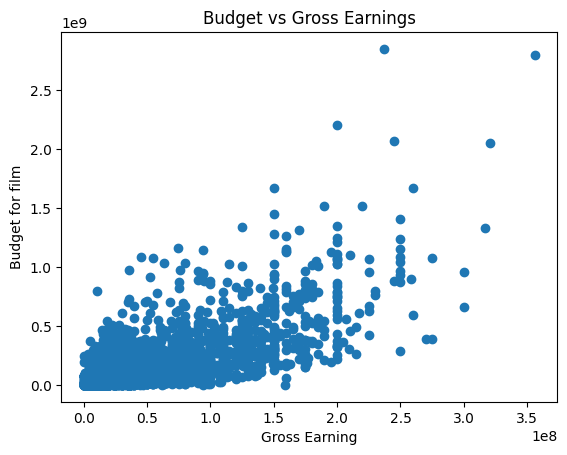

In [21]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earning')
plt.ylabel('Budget for film')
plt.show()

In [22]:
import scipy.stats as st
st.pearsonr(df['gross'], df['budget'])[0]

0.7112703466796725